# Zarządzanie kluczami kryptograficznymi


Jakub Augustyn, Arkadiusz Ryba
Cyberbezpieczeństwo

## Agenda

1. Na czym polega bezpieczeństwo kryptografii?
2. Techniki zarządzania kluczami w kryptografii symetrycznej
3. Dystrybucja klucza w kryptografii asymetrycznej
4. Protokół Diffie-Hellmana oraz Station to station
5. Zastosowanie praktyczne

### 1. Na czym polega bezpieczeństwo kryptografii?

W myśl zasady kerckhoffsa:

>Bezpieczeństwo szyfru nie może opierać się na nieznajomości metody szyfrowania

Oznacza to, że nawet jeśli osoba z zewnątrz pozna sposób szyfrowania oraz wszystkie szczegóły dotyczące działania algorytmu poza samym kluczem, szyfrogram wciąż pozostaje bezpieczny. Inaczej mówiąc, bezpieczeństwo polega na jednym składniku - kluczu. 

W przypadku szyfru idealnego - matematycznie udowodnionego za nie do złamania, najsłabszym ogniwem nie są same klucze i ich skompromitowanie - tylko ich bezpieczna dystrybucja bez udziału osób niepostronnych.

W związku z tym, aby komunikacja była szyfrowana i tym samym bezpieczna, należy znaleźć sposób bezpiecznej dystrybucji klucza szyfrującego komunikację. 

Wymiana lub ustalanie kluczy kryptograficznych w sposób bezpieczny jest koniecznością w przypadku stosowania szyfrów symetrycznych.


**Jak zatem dostarczać klucz?**
1. Fizyczne dostarczenie do drugiej strony - tak zwane *point-to-point*
2. Pośrednik w postaci zaufana organizacji (np. KDC - Centrum Dystrybucji klucza) - generuje klucze i dostarcza odpowiednio dla każdej ze stron
3. Poprzez przesłanie zaszyfrowanego klucza przy pomocy innego klucza (np. wykorzystywanego w poprzedniej sesji)
 - nawet jawnym łączem
 
Wszystkie powyższe metody mają jednocześnie słabe i mocne strony, dlatego są stosowane w różnych sytuacjach
 
Pierwsza opcja z listy wydaje się być na pierwszy rzut oka dobrym pomysłem, jednak gdy dochodzi do komunikacji więcej niż dwóch osób, problem rośnie bardzo szybko - jest *nieskalowalny*. Każda para osób wymaga oddzielnego klucza, aby szyfrogram był niezrozumiały dla osób z zewnątrz (*end-to-end encryption* - tylko autor i odbiorca mogą widzieć wiadomośc w wersji jawnej). W związku z tym dla *n* liczby osób ilość potrzebnych kluczy rośnie kwadratowo. Sposób przeznaczony tylko w sytuacjach, które wymagają szczególnej poufności, jak i samego faktu zatajenia komunikacji. 

Opcja trzecia także nie jest pozbawiona wad. Zauważmy, że w przypadku ataku typu *man in the middle* intruz będzie znał nie tylko obecną wiadomość, lecz także wszytkie przyszłe, zakładając, że znany jest sposób generowania klucza . Ponadto wciąż problemem jest, jak dostarczyć ten pierwszy inicjilizujący komunikację? Również istnieją take rozwiązania - a ich plusem z pewnością jest małe zużycie dostępnych zasobów.

W związku z tym, dla większej ilości osób można zastosować opcję nr **2**, lub jej pochodne kombinacje.
Centrum dystrybucji klucza jest to jednostka odpowiedzialna za odpowiednie wybranie i rozsyłanie kluczy sesji do wszystkich użytkowników o to proszących. Takie centrum przechowuje wtedy tyle kluczy, ile jest użytkowników.
Dzięki takiemu rozwiązaniu problem ilości potrzebnych kluczy maleje (w porównaniu z opcją nr. 1) a samą dystrybucją zajmuje się centrum, a nie użytkownik.

Do tego CDK wykorzystywane jest do połączeń między dwoma użytkownikami jako generator tymczasowego klucza sesji.
CDK wchodzi w skład tak zwanej jej publicznej infrastruktury klucza - jednostki odpowiedzialnej również za uwierzytelnianie użytkowników, które może być przydatne w zwiększeniu zaufania do jednostki przekazującej klucz.

Inaczej mówiąc, jest to abstrakcyjny model urządzeń, aplikacji, polityki, użytkowników
oraz procedur mający na celu tworzenie, przechowywanie, zarządzanie i
rozprowadzanie cyfrowych certyfikatów klucza publicznego. Cała infrastruktura tworzy bezpieczną i
zaufaną strukturę, której kluczowym elementem jest certyfikat.
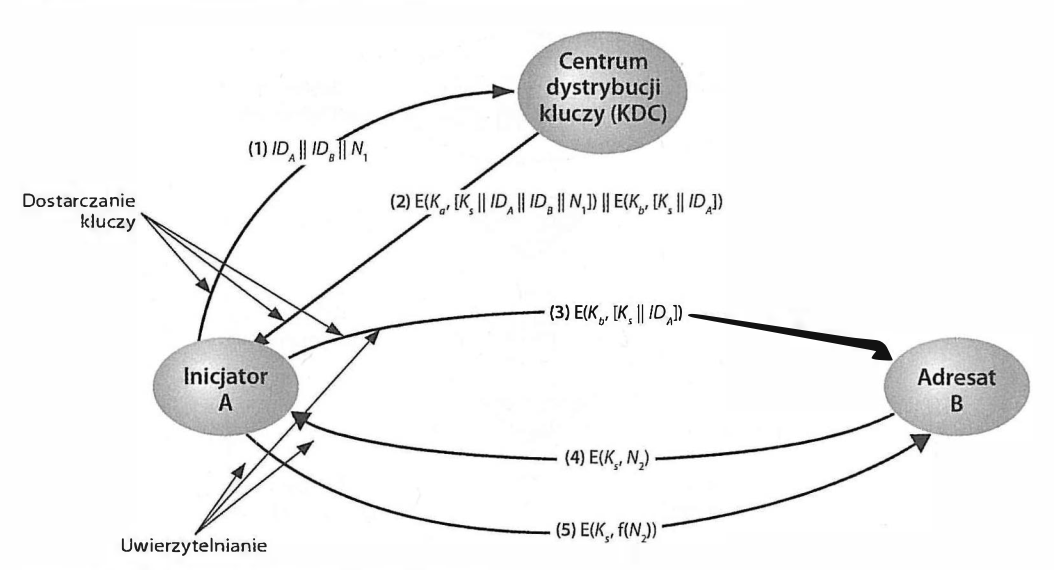


Załóżmy, że $Alice$ chce nawiązać połączenie do $Boba$. Wymiana przebiega w sposób nastepujący:
1) Alice wysyła do $KDC$ żądanie o klucz sesji. Zawierają się w nim identyfikatory użytkowników Alice i Boba oraz jakaś wartość $ N_1 $. Może być to dowolna liczba, nawet psuedolosowa. Ważne, aby za każdym razem była ona inna!
2) $KDC$ odsyła do $Alice$ zaszyfrowany jego kluczem komunikat zawierający Klucz sesji $K_s$, identyfikator $Alice$, $Boba$ oraz wartość $N_1$. Dzięki temu z jednej strony, jedynie $Alice$ odczyta wiadomość dzięki zastosowaniu jego klucza prywatnego, z kolei $KDC$ potwierdza także swoją tożsamość. Ponadto w celach weryfikacji zwracane jest oryginalne żądanie przesłane do Centrum Dystrybucji. W dalszej częsci komunikatu znajduje się $K_s$ oraz id. $Alice$, ale zaszyfrowane kluczem publicznym $Boba$ - jest to przeznaczone do przesłania dalej.
3) $Alice$ wysyła do $Boba$ ww. komunikat pochodzący od $KDC$.
4) $Bob$ wysyła do $Alice$ zaszyfrowaną kluczem sesji warotść $N_2$.
5) $Alice$ wysyła do $Boba$ zaszyfrowaną kluczem sesji umówioną wartość $f(N_2)$, gdzie $f$ jest umówioną funkcją (może to być np. $N+1$).

### 2. Techniki zarządzania kluczami w kryptografii symetrycznej

Jedną ze słabości słabością kryptografii klucza symetrycznego jest fakt, że musimy wysłać ten klucz jawnym łączem i trzymać kciuki, żeby nikt go nie odtworzył - z pomocą rózwiązania tego problemu przychodzi matematyka. 

Asymetria algorytmu szyfrującego ma nie gwarantować bezpieczeństwa teoretycznego, tylko praktyczne - mianowicie, że faktoryzacja klucza ma trwać tak długo, że będzie niepraktyczna (szyfr zostanie złamany, kiedy informacja będzie już nieważna).

### Algorytm Shamira

In [1]:
# ALGORYTM SHAMIRA

!pip install pycrypto

from Crypto.Util.number import getPrime, GCD
import random

range = 128
# p = getPrime(random.randint(low_range, up_range))                   # jawna
p = getPrime(range)

# Ustalanie liczb a i b -> tajnych
a = p-1
while(GCD(a, p-1) > 1):
    a = random.randint(2, p-1)
a_rev = pow(a, -1, p-1)    


b = p-1
while(GCD(b, p-1) > 1 and a != b):
    b = random.randint(2, p-1)
b_rev = pow(b, -1, p-1)

print(f"p = {p}\na = {a}, rev = {a_rev}\nb = {b}, rev = {b_rev}\n")

# Główny mechanizm działania
K = random.randint(2, p)
K_a = pow(K, a, p)              # A wysyla do B liczbe K^a
K_a_b = pow(K_a, b, p)          # B wysyla do A liczbe K^(a*b)
K_b = pow(K_a_b, a_rev, p)      # A liczy klucz i odsyla do B
Key_B = pow(K_b, b_rev, p)      # B liczy klucz

print(f"Klucz sesji:             {K}\nKlucz wyliczony przez B: {Key_B}")

Defaulting to user installation because normal site-packages is not writeable


ModuleNotFoundError: No module named 'Crypto'

### Kwintesencja geometrii w zastosowaniach kryptograficznych - krzywe eliptyczne
Co to jest krzywa eliptyczna?

Równanie przedstawia sie wzorem:

$y^2 = x^3 + ax + b $

gdzie *a, b* są ustalonymi parametrami.

W kryptografii najczęściej bierze się pod uwagę krzywe rozpięte nad ciałami $ \mathbb{Z}_p $, tzn. wszystkie wartości bierzemy $ mod p $.

Punkty należące do krzywej eliptycznej są **grupą**, o ile krzywa spełnia $ \Delta = 4a^3+27b^2 \ne 0 $ (oczywiście *mod p* ).

**Dodawanie** punktów krzywej eliptycznej nie wygląda jak zwykłe, znane nam z działań na liczbach rzeczywistych.
Jak zatem dodawać punkty?

Niech $ P_1 = (x_1, y_1), P_2 = (x_2, y_2), P_3 = P_1 + P_2 $.

Algebraiczna interpretacja:
Jeśli $ x_1 = x_2 $, ale $ y_1 \ne y_2 $, to $$ P_3 = (\infty; \infty) $$
Jeśli $ x_1 = x_2 $, oraz $ y_1 = y_2 $, czyli $ P_1 = P_2 $, to obliczamy według wzoru: $$ x_3 = (\frac{3x_1^2+a}{2y_1})^2 - 2x_1$$
$$ y_3 = -y_1 + (\frac{3x_1^2+a}{2y_1})(x_1 - x_3) $$
W pozostałych przypadkach obowiązuje: $$ x_3 = (\frac{y_2-y_1}{x_2-x_1})^2-x_1-x_2 $$
$$ y_3 = -y_1 +(\frac{y_2-y_1}{x_2-x_1})(x_1-x_3) $$

Potrzebujemy także zdefiniować **logarytm dyskretny**.
Mówimy, że $k$ jest *logarytmem dyskretnym* z $Q$ o podstawie $P$, jeśli *$k\cdot P=Q$*

Problem liczenia logarytmu dyskretnego rośnie bardzo szybko wraz ze wzrostem rządu używanych liczb. Dla normalnej grupy z mnożeniem jest to złożoność rzędu $ 2^{O(\sqrt[3]{\ln{p}\ln{\ln^2{p}}})} $, natomiast dla grupy z elementami krzywej eliptycznej rozpiętej nad $ \mathbb{Z}_p $ złożoność ta wynosi $ 2^{O(\log{p})}$, zatem jest znacznie większa

**Tabelka z przykładami dla dużych liczb**





In [ ]:
from math import inf
import random
from Crypto.Util.number import getPrime

class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __str__(self):
        return f'({self.x}, {self.y})'

def sum_points(P: Point, Q: Point, a, b, m) -> Point:
    R = Point(0, 0)
    
    if(P.x == Q.x and P.y == Q.y):
        s = ((3*(P.x**2) + a) * pow(2*P.y, -1, m))
        s %= m
        R.x = s**2 - 2*P.x
        R.y = (-1)*(P.y + s*(R.x - P.x))
        
    elif(P.x != Q.x):
        s = (Q.y - P.y) * pow((Q.x - P.x), -1, m)
        s %= m
        R.x = s**2 - P.x - Q.x
        R.y = (-1)*P.y + s*(P.x - R.x)
        
    elif(P.x == Q.x):
        R.x, R.y = inf, inf
        
    R.x %= m
    R.y %= m
    return R

def multiply_point(P: Point, k, a, b, m) -> Point:
    R = P
    i = 1
    while(i < k):
        R = sum_points(R, P, a, b, m)
        i += 1
    return R


def Diffie_Hellman_eliptic(size: int):
    # Wybieranie początkowych parametrów
    # y^2 = x^3 + ax + b    mod m
    a, b, m = 9, 17, getPrime(size)
    print(m)
    while True:
        try:
            G_x = random.randint(1, m-1)
            G_y = (G_x**3 + a*G_x + b) % m

            G = Point(G_x, G_y)                    # musi należeć do krzywej

            d_A = random.randint(1, m-1)           # Klucze prywatne, tajne
            d_B = random.randint(1, m-1)

            G_A = multiply_point(G, d_A, a, b, m)        # Klucze publiczne, jawne
            G_B = multiply_point(G, d_B, a, b, m)

            Key_A = multiply_point(G_B, d_A, a, b, m)    # Wyliczanie umówionego klucza
            Key_B = multiply_point(G_A, d_B, a, b, m)
            
            return Key_A, Key_B, d_A, d_B 
        except TypeError:
            pass


# Długość używanej liczby pierwszej w bitach
LENGTH = 16
Key_A, Key_B, priv_A, priv_B = Diffie_Hellman_eliptic(LENGTH)
print("Klucz wyliczony przez Alicje: ", Key_A, "\nKlucz wyliczony przez Boba:   ", Key_B)
print("\nKlucze prywatne:\nA: ", priv_A, "\nB: ", priv_B)

Zauważmy, że czas generowania kluczy istotnie rośnie tutaj bardzo szybko. Już dla liczby pierwszej o długości 20 bitów czas ten wynosi kilkanaście sekund (operacje wykonywane na maszynie z 16GB RAMu i procesorze i7 10th 6 rdzeni/12 wątków)

Zasymulujmy teraz łamanie - tzn. osoba z zewnątrz przechwyciła parametry $a, b, m, G, G_A, G_B$ - odpowiednio parametry krzywej, jej punkt oraz klucze użytkowników - współrzędne pewnej wieloktorności punktu $G$. Szukać będziemy wartości kluczy prywatnych, tzn *logarytmów dyskretnych* kluczy publicznych przy podstawie danego punktu $G$

Poniższy algorytm wykorzystuje metodę *bruteforce*

In [ ]:
# Przykładowe dane dla danej LENGTH = 12
m = 2609
G_A = Point(2130, 164)
G_B = Point(2462, 1339)
G = Point(967, 2127)
d_A, d_B = 1616, 905
a, b = 9, 17

# Normalne wyliczanie kluczy
Key_A = multiply_point(G_B, d_A, a, b, m)
Key_B = multiply_point(G_A, d_B, a, b, m)
print("Klucz wyliczony przez Alicje: ", Key_A, "\nKlucz wyliczony przez Boba:   ", Key_B)
print("\nKlucze prywatne:\nA: ", d_A, "\nB: ", d_B)


i = 2
while True:
    try:
        forced = multiply_point(G, i, a, b, m)
    except TypeError:
        continue
    if(forced.x == G_A.x and forced.y == G_A.y):
        print("Udało sie złamać! Klucz prywatny jednego z użytkowników wynosi: ", i)
        Key = multiply_point(G_B, i, a, b, m)
        print(f"Klucz wyliczony przez użytkowników: ({Key.x}, {Key.y})")
        break
    
    i += 1
    if(not i%100):
        print (i)

W powyższym kodzie dla lepszego zauważenia szybkości programu pokazuje on na standardowym wyjściu obecny „krok” programu, tzn jaką liczbę sprawdza. Widać gołym okiem, że nie jest to szybka procedura i już dla wielkości m rzędu $2^{20}$, nie mówiąc o znacznie wiekszych wykładnikach. 

W praktyce - jak czytamy w dokumencie wydanym przez NIST, rekomenduje on przykładowe krzywe:

**P-224:**

- liczba $p$: $2^{224}-2^{96}+1$ = 26959946667150639794667015087019630673557916260026308143510066298881
```
    =0xffffffff ffffffff ffffffff ffffffff 00000000 00000000 00000001}
```
- liczba $a$: $p-3$ = 26959946667150639794667015087019630673557916260026308143510066298878
```
    (=0xffffffff ffffffff ffffffff fffffffe ffffffff ffffffff fffffffe)
```
- liczba $b$: 18958286285566608000408668544493926415504680968679321075787234672564
```
    (=0xb4050a85 0c04b3ab f5413256 5044b0b7 d7bfd8ba 270b3943 2355ffb4)
```
- liczba $G_x$: 19277929113566293071110308034699488026831934219452440156649784352033
```
    (=0xb70e0cbd 6bb4bf7f 321390b9 4a03c1d3 56c21122 343280d6 115c1d21)
```
- liczba $G_y$: 19926808758034470970197974370888749184205991990603949537637343198772
```
    (=0xbd376388 b5f723fb 4c22dfe6 cd4375a0 5a074764 44d58199 85007e34)
```

**W-448**

- liczba $p$: $2^{448} - 2^{224} - 1$ = 726838724295606890549323807888004534353641360687318060281490199180612328166730772686396383698676545930088884461843637361053498018365439
```
    (=0xffffffff ffffffff ffffffff ffffffff ffffffff ffffffff fffffffe ffffffff ffffffff ffffffff ffffffff ffffffff ffffffff ffffffff)
```
- liczba $a$: 484559149530404593699549205258669689569094240458212040187660132787074885444487181790930922465784363953392589641229091574035657199637535
```
    (=0xaaaaaaaa aaaaaaaa aaaaaaaa aaaaaaaa aaaaaaaa aaaaaaaa aaaaaaa9 ffffffff ffffffff ffffffff ffffffff ffffffff fffffffe 1a76d41f)
```
- liczba $b$: 269199527516891440944194002921483160871719022476784466770922295992819380802492878772739401369880202196329216467349495319191685664513904
```
    (=0x5ed097b4 25ed097b 425ed097 b425ed09 7b425ed0 97b425ed 097b425e 71c71c71 c71c71c7 1c71c71c 71c71c71 c71c71c7 1c72c87b 7cc69f70)
```
- liczba $G_x$: 48455914953040459369954920525866968956909424045821204018766013278707488544448718179093092246578436395339258964122909157403566534562907
```
    (=0xaaaaaaaa aaaaaaaa aaaaaaaa aaaaaaaa aaaaaaaa aaaaaaaa aaaaaaaa 00000000 00000000 00000000 00000000 00000000 00000000 0000cb91)
```
- liczba $G_y$: 355293926785568175264127502063783334808976399387714271831880898435169088786967410002932673765864550910142774147268105838985595290606362
```
    (=0x7d235d12 95f5b1f6 6c98ab6e 58326fce cbae5d34 f55545d0 60f75dc2 8df3f6ed b8027e23 46430d21 1312c4b1 50677af7 6fd7223d 457b5b1a)
```

**Czy używanie wyżej wymienionych krzywych to dobry pomysł?**

Są to krzywe rekomendowane przez Narodowy Instytut Norm i Techniki, zatem nie powinny wzbudzać żadnych podejrzeń aby im nie ufać. Istnieje jednak prawdopodobieństwo, że członkowie NIST zostawiają tzw. backdoor - mając wiedzę, że została użyta jedna z krzywych rekomendowanych, z łatwością mogą wręcz atakiem bruteforce która potem umożliwia im dostęp do zaszyfrowanych wiadomości.

**Jak zatem chronić się przez atakiem man-in-the-middle?**

Zdecydowanie dobrą praktyką będzie tutaj używanie kryptografii asymetrycznej zamiast symetrycznej. Zauważmy, że w razie przechwycenia klucza symetrycznego nawet nie będziemy do końca świadomi, że komunikacja jest podsłuchwiana. Ponadto nie mamy żadnej możliwości autentyfikacji drugiej strony - osoba podszywająca się po przechwyceniu klucza komunikacji będzie mogła sukcesywnie podsłuchwiać, a nawet zakłócać komunikację bez wiedzy żadnej ze stron.

W przypadku kluczy asymetrycznych jest inaczej. Naszą wiadomość możemy podpisać swoim kluczem prywatnym, dzięki czemu potwierdzimy swoją tożsamość. Deszyfrowanie szyfrogramu wtedy można dokonać jedynie za pomocą klucza publicznego - który jest jawny dla każdego. Ponadto dla przesłania tajnej wiadomości używając klucza publicznego odbiorcy mamy pewność, że on i tylko on będzie mógł ją rozszyfrować - nikt inny nie posiada jego klucza prywatnego.

## Techniki zarządzania kluczami w kryptografii asymetrycznej

### Hybrydowy schemat dystrybucji kluczy - Protokół Station-to-Station (STS)

Wyłoniony w 1987 w ramach konkursu *ISDN security* algorytm w głównej mierze bazuje na algorytmie Diffiego-Hellmana jednakże rozszerza go o możliwość uwierzytelniania użytkowników - tym samym zwiększając wiarygodność stron w ustalaniu klucza

#### Schemat działania

1. Alice (czyli osoba rozpoczynająca komunikację) generuje losową wartość $N_1$ podpisuje ją kluczem publicznym Boba i zaszyfrowaną wartość przesyła kanałem komunikacji do Boba.
2. Otrzymaną wiadomość Bob rozszyfrowuje swoim kluczem prywatnym, generuje swoją losową wartość $N_2$ a następnie przesyła do Alice zaszyfrowaną jej kluczem prywantym wiadomość zawierająca otrzymaną wartość $N_1$ i swoją $N_2$
3. Alice otrzymuje zaszyfrowaną wiadomość od Boba i odszyfrowuje ją za pomocą klucza publicznego Boba. Wiadomość zawiera wartość $N_1$ dzięki której Alice ma pewność, że nadawcą faktycznie jest Bob. Nastepnie Alice szyfruje otrzymaną wartość $N_2$ kluczem publicznym Boba a następnie ją przesyła.
4. Alice na podstawie dostępnych wartości $N_1$ i $N_2$ generuje klucz sesji $K_s$
5. Bob otrzymuję wiadomość, odszyfrowuję ją swoim kluczem prywatnym i na podstawie dostępnych wartości $N_1$ i $N_2$ generuje klucz sesji $K_s$
W tym momencie może nastąpić komunikacją za pomocą nowo ustalonego klucza


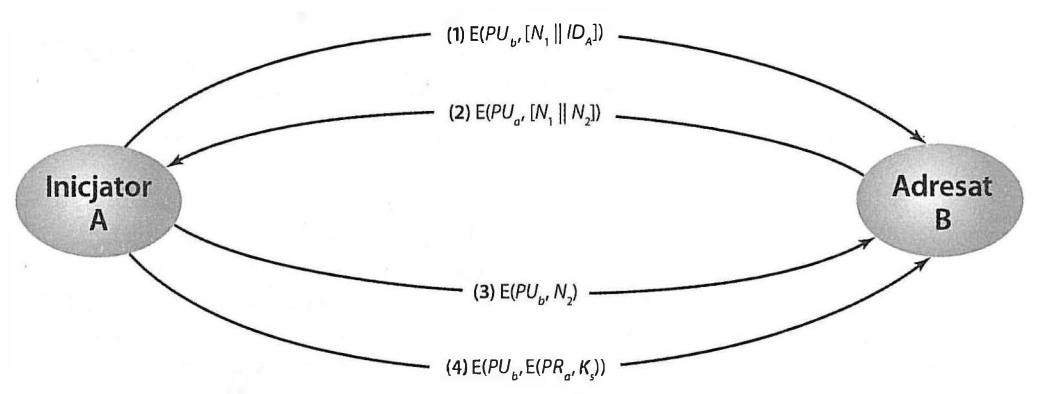


Dzięki powyższemu schematowi uniemożliwiony jest atak typu *man in the middle*

W praktyce stosuje się go w protokole SSL/TLS - jednakże nie bezpośrednio. Najpierw uwierzytelnia się podmiot (klienta lub serwer) za pomocą certyfikatu, a następnie następuje ustalanie klucza za pomocą algorytmu Diffiego-Hellmana.

Rozwinięciem powyższego protokołu oraz nieco innym rozwiązaniem opartym na połączeniu kryptografii symetrycznej i asymetrycznej do dystrybucji kluczy jest rozwiązanie wykorzystywane w systemach IBM *mainframe*
Centrum dystrybucji klucza dostarcza użytkownikom odpowiednie klucze sesji zaszyfrowane przy pomocy kluczy nadrzędnych - stworzonych za pomocą kryptografii asymetrycznej. Dzięki takiemu rozwiązaniu możliwe jest częste zmienianie kluczy sesji, zachowana jest wydajność (sama komunikacja odbywa się za pomocą szyfrowania kluczem symetrycznym), wielka skalowalność, również możliwa jest kompatybilność z wieloma kryptosystemami

In [2]:
#Kod protokołu Station-to-Station

!pip install rsa
import rsa


def encrypt(message, key):
    return rsa.encrypt(message.encode('ascii'), key)


def decrypt(ciphertext, key):
    try:
        return rsa.decrypt(ciphertext, key).decode('ascii')
    except:
        return False


def sign(message, key):
    return rsa.sign(message.encode('ascii'), key, 'SHA-256')


def verify(message, signature, key):
    try:
        return rsa.verify(message.encode('ascii'), signature, key,) == 'SHA-256'
    except:
        return False


# Utworzenie klucza publicznego i prywatnego Alice
pub_key, priv_key = rsa.newkeys(1024)
a = priv_key.save_pkcs1('PEM')
a2 = pub_key.save_pkcs1('PEM')
alice_priv_key = rsa.PrivateKey.load_pkcs1(a)
alice_pub_key = rsa.PublicKey.load_pkcs1(a2)

# Utworzenie klucza publicznego i prywatnego Boba
pub_key_2, priv_key_2 = rsa.newkeys(1024)
b = priv_key_2.save_pkcs1('PEM')
b2 = pub_key_2.save_pkcs1('PEM')
bob_priv_key = rsa.PrivateKey.load_pkcs1(b)
bob_pub_key = rsa.PublicKey.load_pkcs1(b2)


# Ustalenie losowej stałej
g = 4

# Krok 1.
# Alice wybiera liczbe x, liczy g^x i przesyła Bobowi w formie zaszyfrowanej kluczem publicznym Boba
x = 2
g_x = g ** x
g_x_encrypted = encrypt(str(g_x), bob_pub_key)


# Krok 2.
# Bob otrzymuje wiadomość od Alice, wybiera liczbe y, liczy g^y i przesyła g^y oraz odszyfrowaną g^x Alice w formie zaszyfrowanej kluczem publicznym Alice
y = 2
g_y = g ** y
g_x_decrypted_bob = decrypt(g_x_encrypted, bob_priv_key)


g_x_encrypted_bob = encrypt(g_x_decrypted_bob, alice_pub_key)  # bytes
g_y_encrypted_bob = encrypt(str(g_y), alice_pub_key)  # bytes


# Krok 3.
# Alice otrzymuje zaszyfrowaną wiadomość od Boba i odszyfrowuje ją za pomocą klucza publicznego Boba i upewnia się, że faktycznie nadawcą jest Bob

g_x_decrypted_alice = decrypt(g_x_encrypted_bob, alice_priv_key)

if int(g_x_decrypted_alice) == g_x:
    print("Alice ma pewność, że faktycznie nadawcą jest Bob")
else:
    print("Alice nie ma pewności, że faktycznie nadawcą jest Bob")

# Alice szyfruje otrzymaną wartość g^y kluczem publicznym Boba a następnie ją przesyła.

g_y_decrypted_alice = decrypt(g_y_encrypted_bob, alice_priv_key)  # str

g_y_encrypted_alice = encrypt(str(g_y_decrypted_alice), bob_pub_key)  # bytes


# Krok 4.
# Alice na podstawie dostępnych wartości g^x i g^y generuje klucz sesji
g_xy_alice = int(g_y_decrypted_alice) ** int(g_x)


# Krok 5.
# Bob otrzymuję wiadomość, odszyfrowuję ją swoim kluczem prywatnym
# Na podstawie dostępnych wartości g^x i g^y generuje klucz sesji
g_y_decrypted_bob = decrypt(g_y_encrypted_alice, bob_priv_key)

if int(g_y_decrypted_bob) == g_y:
    print("Bob ma pewność, że faktycznie nadawcą jest Alice")
else:
    print("Bob nie ma pewności, że faktycznie nadawcą jest alice")

g_xy_bob = int(g_y) ** int(g_x_decrypted_bob)

# Od tej pory możliwa jest dalsza komunikacja używając nowego klucza szyfrującego


Defaulting to user installation because normal site-packages is not writeable


ModuleNotFoundError: No module named 'rsa'

### Needham–Schroeder protocol

### Protokół Kerberos 
Jest to portokół służący wymianie kluczy (biletów) i uwierzytelnianiu użytkowników w środowisku sieciowym za pośrednictem strony trzeciej. Polega na topologii klient $\leftrightarrow$ serwer + centrum dystrybucji klucza. W dzisiejszym internecie (używany szczegółnie przez Microsoft i system Windows, SMB,) protokół ten przydatny jest do modelu jednokrotnego uwierzytelniania i dostępu do wielu usług. Bazuje on na protokole Needhama-Schroedera przy wymianie kluczy.

#### Zasada działania uwierzytelniania protokołu Kerberos w wersji 5
1. $Klient$ wysyła $wiadomość\_prośba$ do centrum dystrybucji klucza ($KDC$ - *Key distribution center*) z prośbą o rozpoczęcie komunikacji - wiadomość zawiera nazwe klienta, aktualny czas klienta, unikalny dla klienta tak zwany *Ticket Granting Server's principal* (TGS). Taka wiadomość jest wysyłana w *plaintekscie*
2. $KDC$ otrzymuje $wiadomość\_prośba$ od klienta i sprawdza w bazie danych poprawność jego $TGS$, porównuje aktualny czas z czasem wysłanym przez klienta (żeby nie było zbyt dużych różnich - ochrona przed przechwytywaniem i fabrykowaniem wiadomości - **atak powtórzeniowy**). Nastepnie $KDC$ generuje 2 klucze sesji - jedna z nich jest dodawana do $wiadomość\_1$ oraz tak zwany bilet *Ticket Granting Ticket* (TGT), czas trwania biletu. $KDC$ szyfruje $wiadomość\_1$ na 2 sposoby:
- za pomocą $TGS$ szyfruje kopie klucza sesji oraz tak zwany *efektywny czas biletu*, adres IP klienta oraz jego nazwe. Tak zaszyfrowaną wiadomość nazywa się właśnie $TGT$
- następnie kluczem publicznym klienta szyfruje klucz sesji oraz dane Ticketa ($TGT$)

#### Korzystanie z protokołu Kerberos (v5) z serwerem
1. Jeśli użytkownik chce skorzystać z usługi bazującej na protokole Kerberos, najpierw musi się uwierzytelnić w następujący sposób:
- wysyła wiadomość z prośbą o $TGS$ - w tym aktualny czas
- bilet $TGT$ który został pozyskany w poprzednim akapicie
- uzyskać $authenticator$ - jest to wiadomość zaszyfrowana wcześniej uzyskanym kluczem sesji, również zawierająca aktualny czas
Jeśli wszystkie powyższe warunki są spełnione to serwer odpowie wiadomością zawierającą $TGS$
2. W tym momencie, serwer chce wygenerować nową parę kluczy sesji. Odpowiedź ze strony serwera do użytkownika będzie zaszyfrowana kluczem sesji zdobytym za pomocą procesu w poprzednim akapicie (punkt **2.**) i zawiera:
- kopie nowego klucza sesji użytkownika, *efektywny czas biletu*, nazwa klienta
- kopie nowego klucza sesji usługi, *efektywny czas biletu*, aktualny czas $KDC$, adres IP klienta oraz jego nazwe
3. W tym momencie klient za pomocą otrzymanego $TGS$ może uwierzytelniać się bezpośrednio do usługi, i szyfrować wiadomości za pomocą nowo otrzymanego klucza sesji. 
Za pomocą takiego schematu można w każdym momencie sprawdzać integralność wysyłanych danych - za pomocą podpisania wiadomości kluczem publicznym/prywatnym - tym samym nie ma miejsca na *eavesdropping*

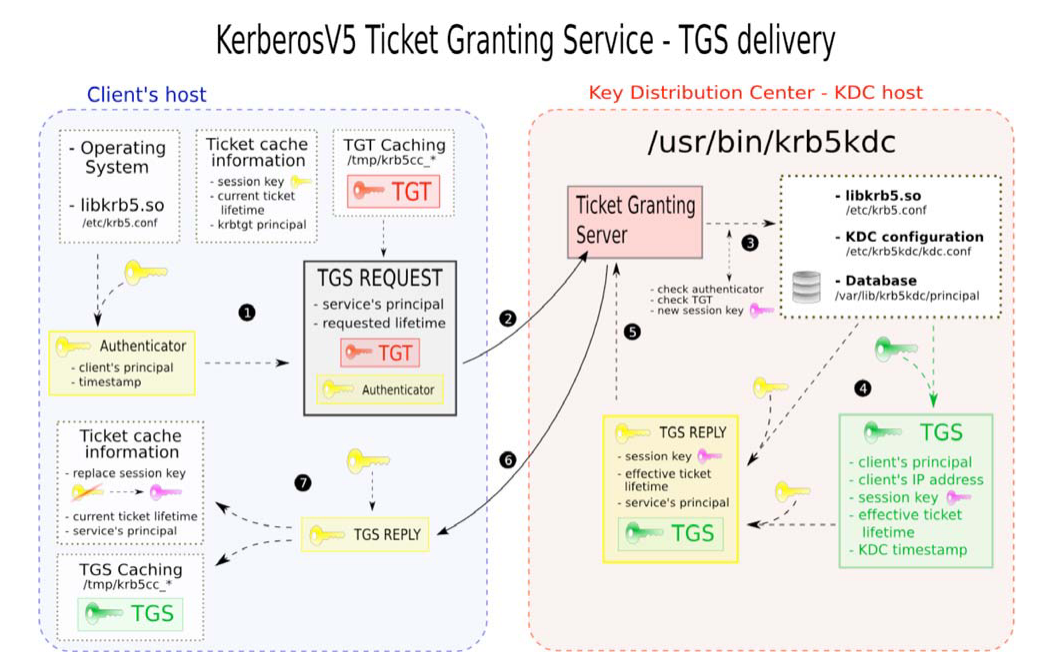

Klucze symetryczne w tym protokole to najczęściej klucze algorytmów: DES albo teraz AES

Kerberos w wersji 5 rozwiązuje problemy poprzednich wersji m.in podszywanie się za inną osobę, atak powtórzeniowy, zmiana adresu ip komputera


## Jakie powinny być zatem zalecenia praktyczne?

Być może poniższa lista będzie wydawała się nieskomplikowana, jednakże należy pamiętać o tym że kryptosystem jest tak bezpieczny jak jego najsłabsze ogniwo. Zatem należy spełnić **każde** z poniższych wymagań.

Bazując na normie NIST:  *$SP 800-130$ A Framework for Designing Cryptographic Key Management Systems*

*CKMS* - Cryptographic Key Management Systems (kryptograficzne systemy zarządzania kluczem)

#### Funkcje zarządzające kluczem oraz metadanymi
$CKMS$ powinno zapewnić:
- utworzenie
- modyfikacje
- zamianę
- usunięcie
kluczy oraz ich metadanych

Trzeba również zadbać o:
- integralność
- uwierzytelnianie źródła (jednej strony komunikacji)
- poufność 
więc w praktyce polega to na wymogu podpisywaniu wiadomości kluczem oraz następnie jej szyfrowanie, jeśli strona nie  zapewni tych podstawowych wymagań funkcji, dalsza współpraca z nią nie jest wskazana

#### Generacja klucza

Każda prośba użytkownika powinna zostać rozpatrzona w niedługim czasie oczekiwania
Aby owa prośba była rzetelnia użytkownik musi zadbać o:
- sprecyzowanie typu klucza i jego parametrów (np. wersję używanego algorytmu)
- związane z kluczem metadane (np. czas)
Jeśli użytkownik chce od razu poznać klucz (niektóre algorytmy działają właśnie w taki sposób - np. ), $CKMS$ powinnno zadbać o jego wydanie a w niektórych przypadkach nawet o podanie funkcji generującej klucz i funkcji generującej liczby losowe.

#### Rejestracja

W celu wstępnego uwierzytelnienia osoby/organizacji/urządzenia należy zadbać o jego wstępne zarejestrowanie w systemie (a nawet dostarczenie skojarzonego z nim klucza wraz z metadanymi). W celu zapewnienia jak najwyżsego bezpieczeństwa, uwierzytelnianie jednostki powinno odbywać się przez fizyczną interakcję - w celu powiązania jej danych z kluczem. 
Zatem $CKMS$ powinno jawnie sprecyzować wszystkie procedury związane z powyższym procesem.

#### Aktywowanie klucza

W rzeczywistości, większość kluczy zaraz po wygenerowaniu jest aktywowana, jednakże w niektórych scenariuszach klucz powinien  mieć dokładnie opisany czas/date kiedy staje się aktywny i może być używany aż do czasu jego deaktywacji (również sprecyzowanej)
$CKMS$ powinno:
- sprecyzować metodę aktywacji klucza
- określić  warunki umożliwiające jego aktywację
- w niektórych przypadkach powiadamiać użytkowników o rozpoczęciu procedury aktywacji 

#### Deaktywowanie klucza

Powinno określić się górne limity, aby nie doszło do skompromitowania kryptosystemu - na tym polega kwintesencja samej kryptografii - szyfr powinien być ważny i pozostać niezłamany niekrócej niż termin ważności chronionej informacji.
Dlatego $CKMS$ powinno:
- opisać procedurę deaktywacji dla każdego typu klucza oraz na jakich warunkach się odbywa (np. po upłynięciu czasu, po przekroczeniu danej liczby użyć albo po zaszyfrowaniu określonej ilości danych) 
- określić czy deaktywowanie klucza odbywa się automatycznie/manualnie
- dopuścić możliwość zmiany terminu dezaktywacji
- powiadamiać użytkownika o rozpoczęciu dezaktywacji

#### Unieważnianie klucza
Od dezaktywacji różni się tym, że jednostka może chcieć zakończyć ważność klucza przed terminem dezaktywacji - np. jeśli klucz został skompromitowany.
$CKMS$ powinno dopuścić taką możliwość i dokonać tej procedury jak najszybciej, a odpowiednie jednostki zostać powiadomione (np. strony, które używały tego klucza w przeszłości).

Podobnie wygląda procedura zawieszenia i reaktywacji klucza

#### Dziedziczenie i aktualizowanie klucza

Polega na korzystaniu z części klucza w innej funkcji - przykładowo dziedzicząc sekretny składnik z innego klucza/hasła - tak jak w algorytmie Diffiego-Hellmana

Czasem aktualizowanie klucza polega po prostu na jego zastąpieniu

Takowy proces musi być dobrze opisany przez $CKMS$, a odpowiedni użytkownicy powiadamiani.

#### Metadane

Każdy klucz powinien nieść ze sobą odpowiednie metadane, w celu ułatwienia późniejszej identyfikacji.
$CKMS$ powinien zatem zadbać o:
- dokładnie określenie, które metadane będą używane oraz zapewnić mechanizm ich ochrony (integralności, poufności, uwierzytelniania strony).
- możliwość ich zmiany, usunięcia, wylistowania (dopiero po mechaniźmie uwierzytelniania użytkownika)




## Źródła
https://csrc.nist.gov/publications/detail/sp/800-130/final
https://the-it-ninja.blogspot.com/2015/11/station-to-station-encryption-in-python.html
https://www.ibm.com/docs/pl/aix/7.2?topic=network-kerberos
https://www.mimuw.edu.pl/~czarnik/zajecia/bezp09/W08-kerberos.pdf
https://sun.aei.polsl.pl/~kfrancik/bsk/dokumenty/bsk6_08.pdf
https://en.wikipedia.org/wiki/Needham%E2%80%93Schroeder_protocol
https://engineering.purdue.edu/kak/compsec/NewLectures/Lecture10.pdf
https://www.kerberos.org/software/adminkerberos.pdf
https://nvlpubs.nist.gov/nistpubs/SpecialPublications/NIST.SP.800-186-draft.pdf
